#**Introduction**

In this project, we aim to build a machine learning model to predict the likelihood of a customer defaulting on a home credit loan. This is a classification problem where the target variable is binary, indicating whether the customer will default (1) or not (0).

#Data Collection and Understanding

##Load Data

In [ ]:
train_data= pd.read_csv('/content/drive/MyDrive/home-credit-default-risk/application_train.csv')

##Our Approach

In [ ]:
import drive.MyDrive.Datasets.my_functions

In [ ]:
from my_functions import *

First we classified data colums into two categories :\
=> Necessary Columns\
=> Unnecessary Columns\
-through this approach we will go with necessary columns and dropping unnecessary columns

In [ ]:
train_data.shape

(307511, 122)

In [ ]:
ness_cols = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
             'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
             'DAYS_EMPLOYED','OWN_CAR_AGE','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS','ORGANIZATION_TYPE','EXT_SOURCE_2','EXT_SOURCE_1',
             'EXT_SOURCE_2', 'EXT_SOURCE_3','LIVINGAREA_AVG','TOTALAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
             'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','FLAG_MOBIL',
             'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
             'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','DAYS_LAST_PHONE_CHANGE']

In [ ]:
unness_cols = set(train_data.columns) - set(ness_cols)
print(len(unness_cols))
print(len(ness_cols))

76
47


In [ ]:
print(f'Total columns : {train_data.shape[1]}\n')
print(f'number of unnessery columns : {len(unness_cols)}\n')
print('Dropping unnessery columns .....\n')
drop_columns(train_data,unness_cols)
print(f'number of total columns after droppping : {train_data.shape[1]} \n')

Total columns : 122

number of unnessery columns : 76

Dropping unnessery columns .....

number of total columns after droppping : 46 



Now after dropping unnecessary columns the number of columns reduced to be 45 columns instead of 122 column

In [ ]:
train_data.shape

(307511, 46)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [ ]:
train_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3,LIVINGAREA_AVG,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.139376,0.0190,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,0.0549,0.0714,1.0,0.0,1.0,0.0,-828.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.729567,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0


Seperating data into numerical and categorical columns

In [ ]:
nums_colunms,cat_columns = split_num_cat(train_data)
print(f'number of numerical coloumns : {len(nums_colunms)}\n')
print(f'number of catogeriacal coloumns : {len(cat_columns)}\n')

number of numerical coloumns : 36

number of catogeriacal coloumns : 10



now we will check nulls for both numerical and categorical columns

In [ ]:
num_null_df , cat_null_df  = null_columns(train_data)
print(f'data have {num_null_df.shape[0]} numerical columns with null values with percentage {(num_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')
print(f'data have {cat_null_df.shape[0]} catigeriocal columns with null values with percentage {(cat_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')

#null numerical coloum analysis

print('for numerical columns : \n ')
nvar020 = num_null_df[(num_null_df['Percentage'] <= 20) & (num_null_df['Percentage'] > 0)]
print(f'null columns with percentage 0-20 % : {len(nvar020)}\n')
nvar2040 = num_null_df[(num_null_df['Percentage'] <= 40) & (num_null_df['Percentage'] > 20)]
print(f'null columns with percentage 20-40 % : {len(nvar2040)}\n')
nvar4060 = num_null_df[(num_null_df['Percentage'] <= 60) & (num_null_df['Percentage'] > 40)]
print(f'null columns with percentage 40-60 % : {len(nvar4060)}\n')
nvar6080 = num_null_df[(num_null_df['Percentage'] <= 80) & (num_null_df['Percentage'] > 60)]
print(f'null columns with percentage 60-80 % : {len(nvar6080)}\n')
nvar80100 = num_null_df[(num_null_df['Percentage'] <= 100) & (num_null_df['Percentage'] > 80)]
print(f'null columns with percentage 80-100 % : {len(nvar80100)}\n')

#null categerical coloum analysis

print('for categeical columns : \n ')
cvar020 = cat_null_df[(cat_null_df['Percentage'] <= 20) & (cat_null_df['Percentage'] > 0)]
print(f'null columns with percentage 0-20 % : {len(cvar020)}\n')
cvar2040 = cat_null_df[(cat_null_df['Percentage'] <= 40) & (cat_null_df['Percentage'] > 20)]
print(f'null columns with percentage 20-40 % : {len(cvar2040)}\n')
cvar4060 = cat_null_df[(cat_null_df['Percentage'] <= 60) & (cat_null_df['Percentage'] > 40)]
print(f'null columns with percentage 40-60 % : {len(cvar4060)}\n')
cvar6080 = cat_null_df[(cat_null_df['Percentage'] <= 80) & (cat_null_df['Percentage'] > 60)]
print(f'null columns with percentage 60-80 % : {len(cvar6080)}\n')
cvar80100 = cat_null_df[(cat_null_df['Percentage'] <= 100) & (cat_null_df['Percentage'] > 80)]
print(f'null columns with percentage 80-100 % : {len(cvar80100)}\n')


data have 18 columns with null values with percentage 39.13 % of all columns

data have 16 numerical columns with null values with percentage 34.78 % of all columns

data have 2 catigeriocal columns with null values with percentage 4.35 % of all columns

for numerical columns : 
 
null columns with percentage 0-20 % : 12

null columns with percentage 20-40 % : 0

null columns with percentage 40-60 % : 3

null columns with percentage 60-80 % : 1

null columns with percentage 80-100 % : 0

for categeical columns : 
 
null columns with percentage 0-20 % : 1

null columns with percentage 20-40 % : 1

null columns with percentage 40-60 % : 0

null columns with percentage 60-80 % : 0

null columns with percentage 80-100 % : 0



From above analysis of null columns:
- most of nulls in numerical columns
- there is two null categorical columns with low percentage
- there is one numerical columns with high percentage of null values above 60%

In [ ]:
list_num_60 = columns_with_null_percentage(num_null_df,60)
print(f'numerical columns with null valuse more than or equal 60 % : {list_num_60}\n')
print(f'number of numerical columns with null valuse more than or equal 60 % : {len(list_num_60)}\n')

list_cat_60 = columns_with_null_percentage(cat_null_df,60)
print(f'catiegerical columns with null valuse more than or equal 60 % : {list_cat_60}\n')
print(f'number of catiegerical columns with null valuse more than or equal 60 % : {len(list_cat_60)}\n')

numerical columns with null valuse more than or equal 60 % : ['OWN_CAR_AGE']

number of numerical columns with null valuse more than or equal 60 % : 1

catiegerical columns with null valuse more than or equal 60 % : []

number of catiegerical columns with null valuse more than or equal 60 % : 0



Dropping the columns with high percentage null value

In [ ]:
drop_columns(train_data,list_num_60)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3,LIVINGAREA_AVG,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.139376,0.0190,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,0.0549,0.0714,1.0,0.0,1.0,0.0,-828.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.729567,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,0.1965,0.2898,0.0,0.0,0.0,0.0,-273.0,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,0.0257,0.0214,0.0,0.0,0.0,0.0,0.0,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.218859,0.9279,0.7970,6.0,0.0,6.0,0.0,-1909.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.661024,0.0061,0.0086,0.0,0.0,0.0,0.0,-322.0,0.0,0.0


now getting columns that have small number of null rows

In [ ]:
num_row_below_15 = columns_with_null_rows(num_null_df,15)
print(f'numerical colunms with null rows below 15 : {num_row_below_15}\n')
print(f'number of numerical colunms with null rows below 15 : {len(num_row_below_15)}\n')

cat_row_below_15 = columns_with_null_rows(cat_null_df,15)
print(f'catergerical colunms with null rows below 15 : {cat_row_below_15}\n')
print(f'number of categerical colunms with null rows below 15 : {len(cat_row_below_15)}\n')

numerical colunms with null rows below 15 : ['AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

number of numerical colunms with null rows below 15 : 3

catergerical colunms with null rows below 15 : []

number of categerical colunms with null rows below 15 : 0



there is three numerical columns with fifteen null samples so we will drop those rows from data  

In [ ]:
train_data = drop_rows(train_data,num_row_below_15)

Check null again afer removing

In [ ]:
num_null_df , cat_null_df  = null_columns(train_data)
print(f'data have {num_null_df.shape[0]} numerical columns with null values with percentage {(num_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')
print(f'data have {cat_null_df.shape[0]} catigeriocal columns with null values with percentage {(cat_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')


data have 14 columns with null values with percentage 31.11 % of all columns

data have 12 numerical columns with null values with percentage 26.67 % of all columns

data have 2 catigeriocal columns with null values with percentage 4.44 % of all columns



number of null columns decreased from 18 column to 14 column remaining null columns will be imputed

At first :\
we will impute numerical columns with missforest algorthim

In [ ]:
!pip install dask[missforest]
!pip install dask[lightgbm]
!pip install dask[dask-expr]


In [ ]:
#extract numerical columns
num_col = list(num_null_df['Columns_names'])

#apply missforest algorthim
df_imputed = miss_forest_impute(train_data,num_col)

#replace null values with imputed values
train_data[num_col] = df_imputed

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
 40%|████      | 2/5 [01:53<02:52, 57.48s/it]/usr/local/lib/python3.10/dist-packages/missforest/missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
/usr/local/lib/python3.10/dist-packages/missforest/missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 40%|████      | 2/5 [02:52<04:19

now check nulls again to make sure that all null numerical columns have been imputed

In [ ]:
num_null_df , cat_null_df  = null_columns(train_data)
print(f'data have {num_null_df.shape[0]} numerical columns with null values with percentage {(num_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')
print(f'data have {cat_null_df.shape[0]} catigeriocal columns with null values with percentage {(cat_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')


data have 2 columns with null values with percentage 4.44 % of all columns

data have 0 numerical columns with null values with percentage 0.00 % of all columns

data have 2 catigeriocal columns with null values with percentage 4.44 % of all columns



now dealing with null categorical columns

In [ ]:
#extract null categorical columns
null_cat_col = list(cat_null_df['Columns_names'])

#check if this column is balanced or not
for i in null_cat_col:
  print(f'column name : {i}')
  c = check_balance(train_data,i)
  print(c)
  print('\n')

column name : OCCUPATION_TYPE
                    Class  Count  Percentage
0                Laborers  55184   17.946250
1             Sales staff  32101   10.439485
2              Core staff  27569    8.965645
3                Managers  21369    6.949359
4                 Drivers  18602    6.049510
5   High skill tech staff  11379    3.700536
6             Accountants   9811    3.190611
7          Medicine staff   8536    2.775971
8          Security staff   6720    2.185394
9           Cooking staff   5945    1.933358
10         Cleaning staff   4653    1.513190
11  Private service staff   2652    0.862450
12     Low-skill Laborers   2093    0.680659
13   Waiters/barmen staff   1348    0.438380
14            Secretaries   1304    0.424071
15          Realty agents    751    0.244231
16               HR staff    563    0.183092
17               IT staff    526    0.171059


column name : NAME_TYPE_SUITE
             Class   Count  Percentage
0    Unaccompanied  248514   80.818612
1    

column 'NAME_TYPE_SUITE' have 80% repeated values and small null percentages so we will drop it rather than impute

In [ ]:
col_name = ['NAME_TYPE_SUITE']
drop_columns(train_data,col_name)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3,LIVINGAREA_AVG,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.139376,0.019000,0.014900,2.0,2.0,2.0,2.0,-1134.0,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.501488,0.054900,0.071400,1.0,0.0,1.0,0.0,-828.0,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.729567,0.074282,0.068615,0.0,0.0,0.0,0.0,-815.0,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.570424,0.074333,0.068711,2.0,0.0,2.0,0.0,-617.0,0.024410,1.544607
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.586810,0.074092,0.068699,0.0,0.0,0.0,0.0,-1106.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.522774,0.196500,0.289800,0.0,0.0,0.0,0.0,-273.0,0.007684,1.254349
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.491191,0.025700,0.021400,0.0,0.0,0.0,0.0,0.0,-0.002938,1.166771
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.218859,0.927900,0.797000,6.0,0.0,6.0,0.0,-1909.0,0.000000,1.000000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.661024,0.006100,0.008600,0.0,0.0,0.0,0.0,-322.0,0.000000,0.000000


now we will impute the other null categorical column with randomforest algorthim

In [ ]:
#extract categorical columns
nums_colunms,cat_columns = split_num_cat(train_data)

#apply random forest algorthim
train_data = impute_categorical(train_data,cat_columns)

now check null again to make sure all categorical columns have been imputed

In [ ]:
num_null_df , cat_null_df  = null_columns(train_data)
print(f'data have {num_null_df.shape[0]} numerical columns with null values with percentage {(num_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')
print(f'data have {cat_null_df.shape[0]} catigeriocal columns with null values with percentage {(cat_null_df.shape[0] / train_data.shape[1]) * 100:.2f} % of all columns\n')

data have 0 columns with null values with percentage 0.00 % of all columns

data have 0 numerical columns with null values with percentage 0.00 % of all columns

data have 0 catigeriocal columns with null values with percentage 0.00 % of all columns



In [ ]:
#make a copy of data after handling null values for both numerical and categorical columns
train_data.to_csv("/content/drive/MyDrive/Datasets/app_v1", index=False)

now we will check for repeated values in categorical columns

In [ ]:
print(categorical_column_frequency(train_data,cat_columns))

                 Value  Frequency  Percentage         Column_name
84          Cash loans     278219   90.478901  NAME_CONTRACT_TYPE
18   House / apartment     272856   88.734813   NAME_HOUSING_TYPE
24                   Y     213306   69.368707     FLAG_OWN_REALTY
102                  N     202913   65.988826        FLAG_OWN_CAR
94                   F     202439   65.834678         CODE_GENDER
..                 ...        ...         ...                 ...
90          Unemployed         22    0.007155    NAME_INCOME_TYPE
91             Student         18    0.005854    NAME_INCOME_TYPE
92         Businessman         10    0.003252    NAME_INCOME_TYPE
93     Maternity leave          5    0.001626    NAME_INCOME_TYPE
96                 XNA          4    0.001301         CODE_GENDER

[104 rows x 4 columns]


the two columns with high percentage in repeated value is necessary to our data so we cant drop them

In [ ]:
df = highly_correlated_features(train_data[nums_colunms],target_col='TARGET',threshold=0.8)

[('AMT_GOODS_PRICE', 'AMT_CREDIT'), ('FLAG_EMP_PHONE', 'DAYS_EMPLOYED'), ('CNT_FAM_MEMBERS', 'CNT_CHILDREN'), ('REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT'), ('LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION'), ('TOTALAREA_MODE', 'LIVINGAREA_AVG'), ('OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE'), ('DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE')]


AMT_GOODS_PRICE
AMT_CREDIT
correlation between two features : 0.9866020213847474
correlation between AMT_GOODS_PRICE and target : 0.03964928897185311
correlation between AMT_CREDIT and target : 0.03037140640423492
AMT_CREDIT should be dropped

FLAG_EMP_PHONE
DAYS_EMPLOYED
correlation between two features : 0.9997550110715002
correlation between FLAG_EMP_PHONE and target : 0.04598934005719946
correlation between DAYS_EMPLOYED and target : 0.044938721587430536
DAYS_EMPLOYED should be dropped

CNT_FAM_MEMBERS
CNT_CHILDREN
correlation between two features : 0.8791638310137909
correlation between CNT_FAM_MEMBERS

In [ ]:
#features less correlated to target variable
print(df)
print(len(df))

{'REGION_RATING_CLIENT', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_CREDIT', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'LIVE_REGION_NOT_WORK_REGION', 'DAYS_EMPLOYED'}
8


In [ ]:
drop_columns(train_data,df)

{'REGION_RATING_CLIENT', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_CREDIT', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'LIVE_REGION_NOT_WORK_REGION', 'DAYS_EMPLOYED'}


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,LIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,24700.5,351000.0,...,Business Entity Type 3,0.083037,0.262949,0.139376,0.019000,2.0,2.0,-1134.0,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,35698.5,1129500.0,...,School,0.311267,0.622246,0.501488,0.054900,1.0,0.0,-828.0,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,6750.0,135000.0,...,Government,0.547138,0.555912,0.729567,0.074282,0.0,0.0,-815.0,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,29686.5,297000.0,...,Business Entity Type 3,0.530161,0.650442,0.570424,0.074333,2.0,0.0,-617.0,0.024410,1.544607
4,100007,0,Cash loans,M,N,Y,0,121500.0,21865.5,513000.0,...,Religion,0.529683,0.322738,0.586810,0.074092,0.0,0.0,-1106.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,27558.0,225000.0,...,Services,0.145570,0.681632,0.522774,0.196500,0.0,0.0,-273.0,0.007684,1.254349
307507,456252,0,Cash loans,F,N,Y,0,72000.0,12001.5,225000.0,...,XNA,0.379741,0.115992,0.491191,0.025700,0.0,0.0,0.0,-0.002938,1.166771
307508,456253,0,Cash loans,F,N,Y,0,153000.0,29979.0,585000.0,...,School,0.744026,0.535722,0.218859,0.927900,6.0,0.0,-1909.0,0.000000,1.000000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,20205.0,319500.0,...,Business Entity Type 1,0.499231,0.514163,0.661024,0.006100,0.0,0.0,-322.0,0.000000,0.000000


In [ ]:
#make a copy of data after handling high correlated values
train_data.to_csv("/content/drive/MyDrive/Datasets/app_v2", index=False)

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/app_v2')

In [ ]:
train_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,LIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,24700.5,351000.0,...,Business Entity Type 3,0.083037,0.262949,0.139376,0.019000,2.0,2.0,-1134.0,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,35698.5,1129500.0,...,School,0.311267,0.622246,0.501488,0.054900,1.0,0.0,-828.0,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,6750.0,135000.0,...,Government,0.547138,0.555912,0.729567,0.074282,0.0,0.0,-815.0,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,29686.5,297000.0,...,Business Entity Type 3,0.530161,0.650442,0.570424,0.074333,2.0,0.0,-617.0,0.024410,1.544607
4,100007,0,Cash loans,M,N,Y,0,121500.0,21865.5,513000.0,...,Religion,0.529683,0.322738,0.586810,0.074092,0.0,0.0,-1106.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307491,456251,0,Cash loans,M,N,N,0,157500.0,27558.0,225000.0,...,Services,0.145570,0.681632,0.522774,0.196500,0.0,0.0,-273.0,0.007684,1.254349
307492,456252,0,Cash loans,F,N,Y,0,72000.0,12001.5,225000.0,...,XNA,0.379741,0.115992,0.491191,0.025700,0.0,0.0,0.0,-0.002938,1.166771
307493,456253,0,Cash loans,F,N,Y,0,153000.0,29979.0,585000.0,...,School,0.744026,0.535722,0.218859,0.927900,6.0,0.0,-1909.0,0.000000,1.000000
307494,456254,1,Cash loans,F,N,Y,0,171000.0,20205.0,319500.0,...,Business Entity Type 1,0.499231,0.514163,0.661024,0.006100,0.0,0.0,-322.0,0.000000,0.000000


Dealing with outliers

In [ ]:
nums_colunms,cat_columns = split_num_cat(train_data)

In [ ]:
column_with_outliers = find_columns_with_outliers(train_data[nums_colunms])
print(column_with_outliers)
print(len(column_with_outliers))

<ipython-input-11-786e3656f6a4>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  column_with_outliers = find_columns_with_outliers(train_data[nums_colunms])


['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'LIVINGAREA_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
22


<ipython-input-15-c5129d15f819>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


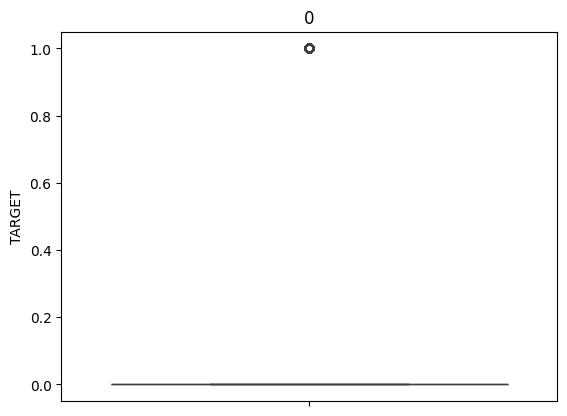

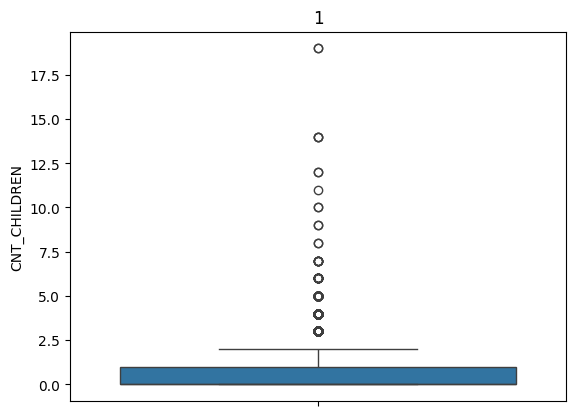

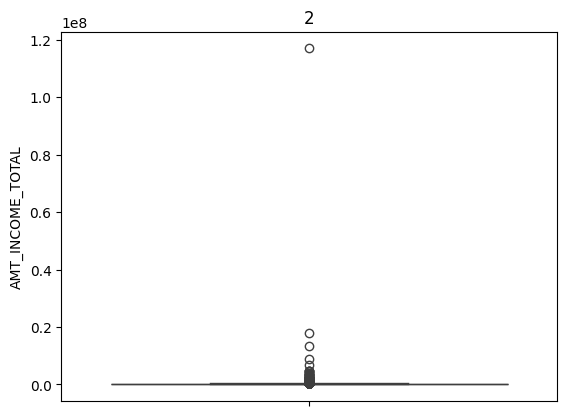

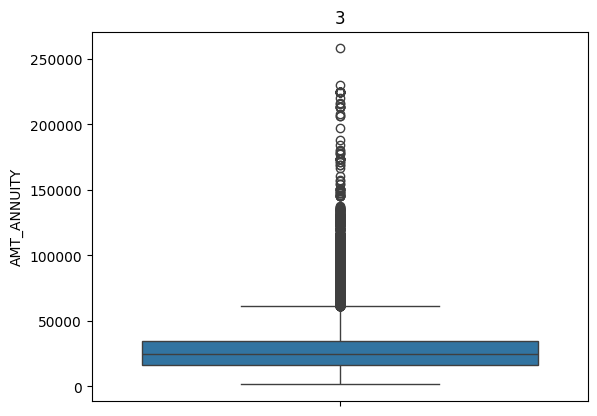

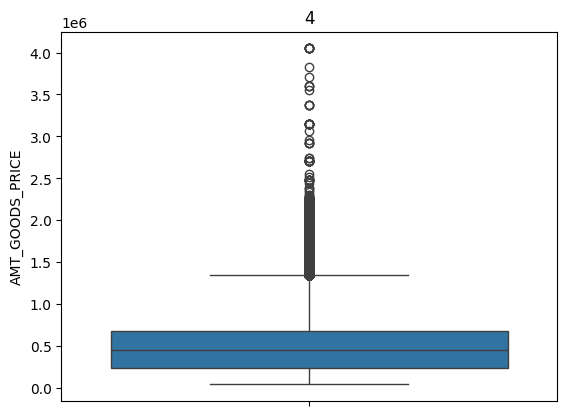

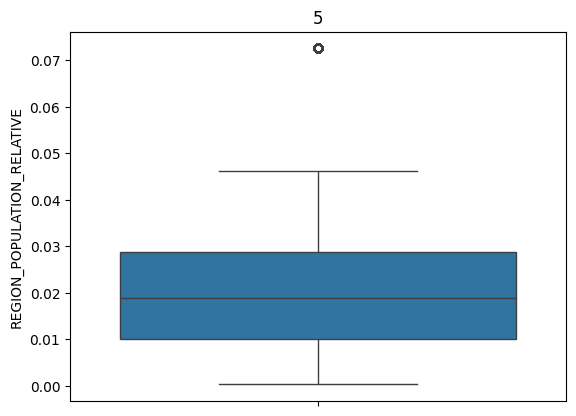

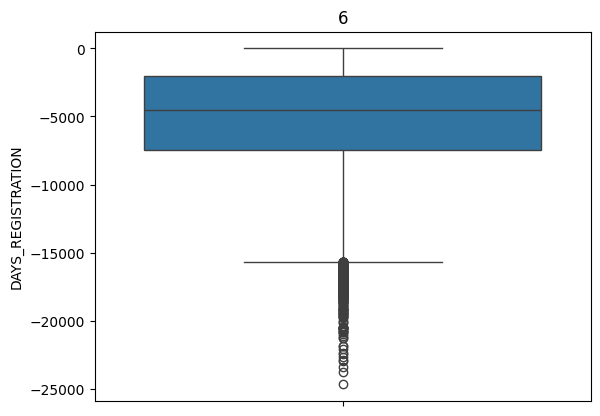

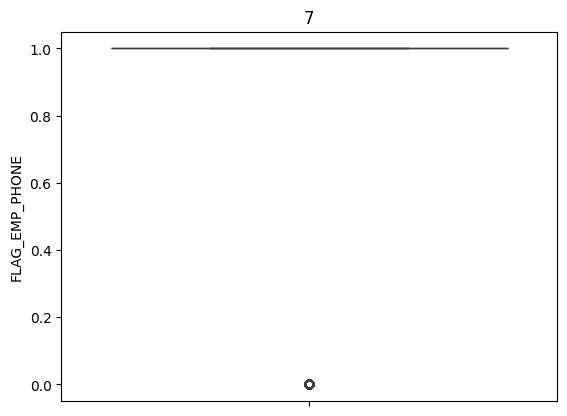

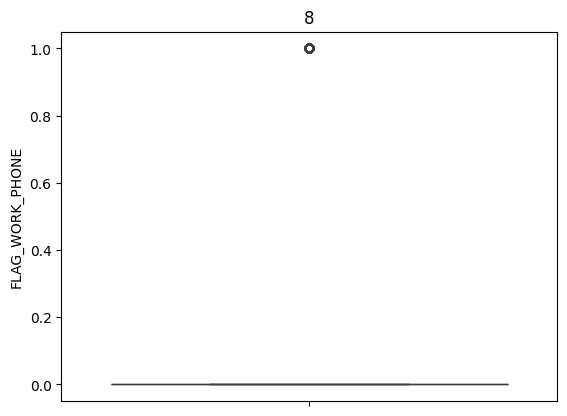

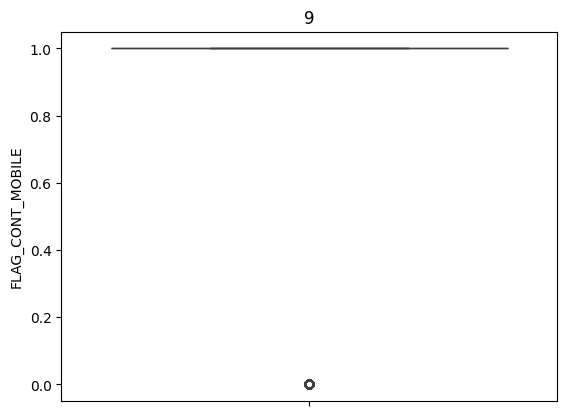

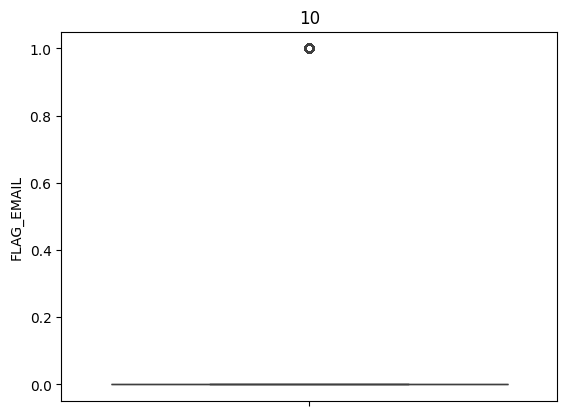

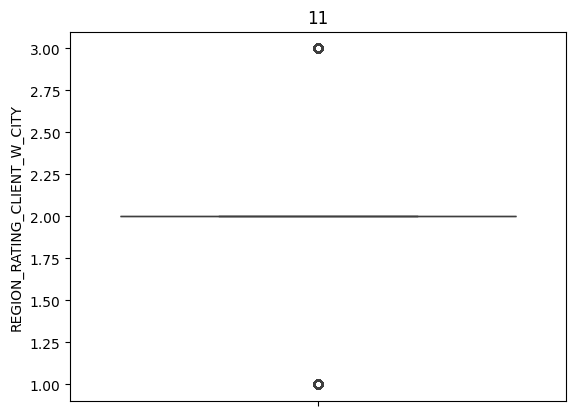

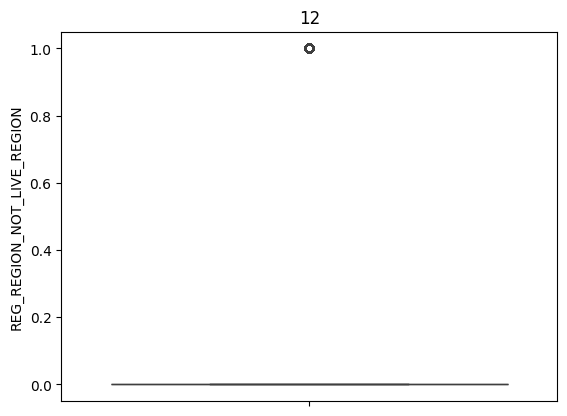

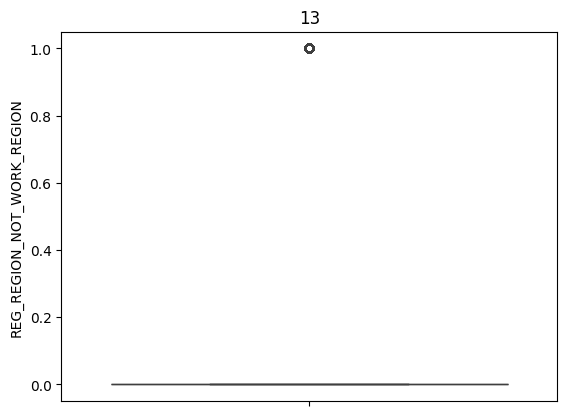

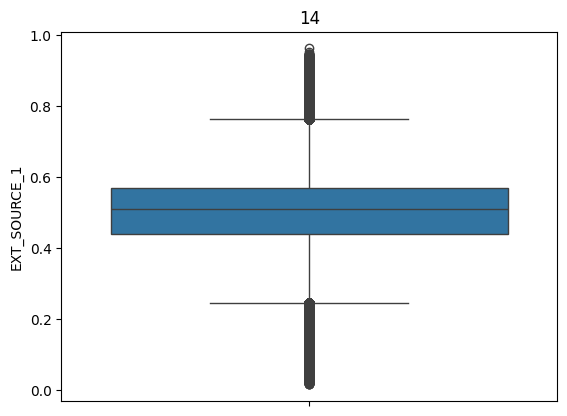

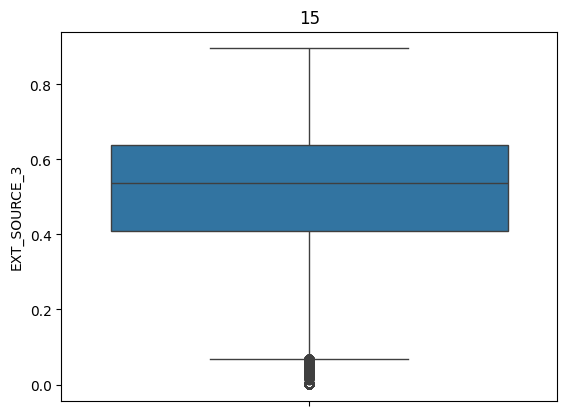

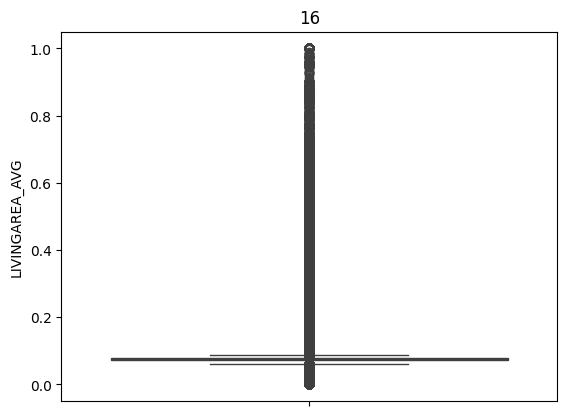

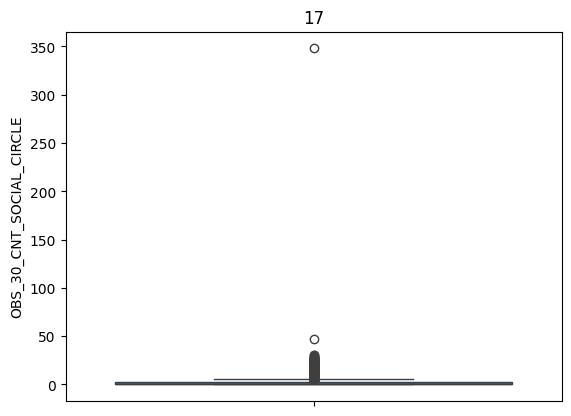

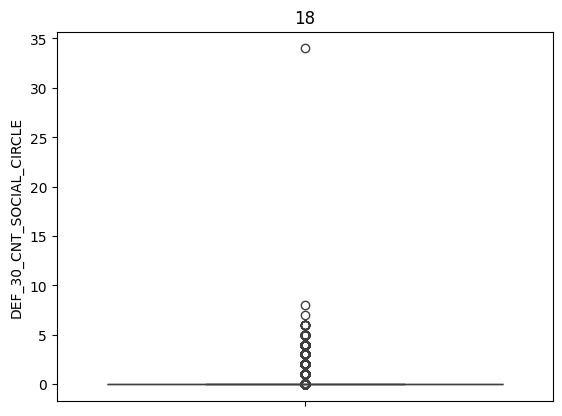

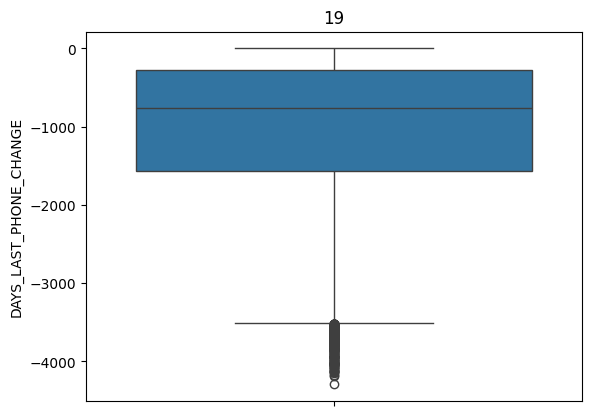

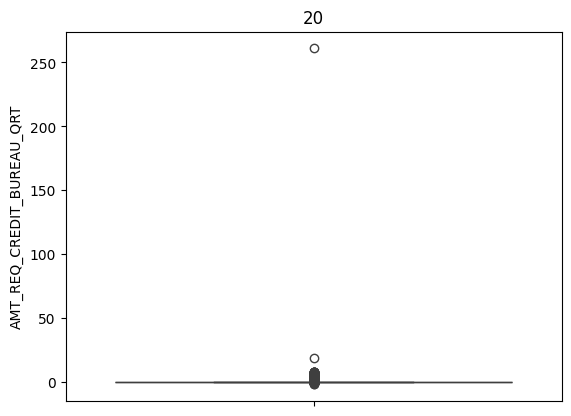

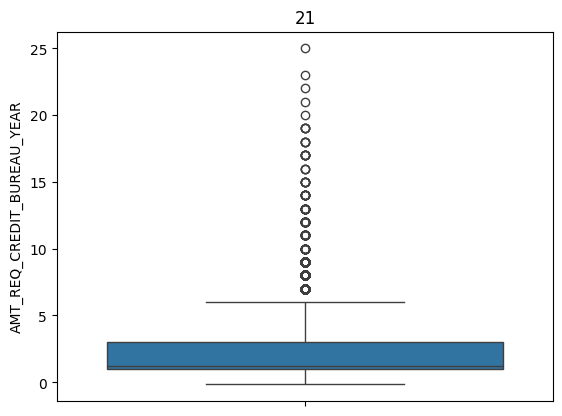

In [ ]:
#verifing outliers of this columns
import seaborn as sns
import matplotlib.pyplot as plt
#print(column_with_outliers[3])
x = 0
for i in column_with_outliers:
  plt.figure(i)
  plt.title(x)
  sns.boxplot(data = train_data[i])
  x += 1



In [ ]:
#spillting column with outlier from labeled columns
outlier_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
'EXT_SOURCE_1', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR']

print(outlier_cols)
print(len(outlier_cols))


['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
13


In [ ]:
def outliers_clamping(df,col):

    Q1 = np.percentile(df[col], 25, method='midpoint')
    Q3 = np.percentile(df[col], 75, method='midpoint')
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Use np.where to clamp values
    return np.where(df[col] > upper_bound, upper_bound,
                    np.where(df[col] < lower_bound, lower_bound, df[col]))

now we will clam the outliers

In [ ]:
for col in outlier_cols:
    train_data[col] = outliers_clamping(train_data,col)

In [ ]:
column_with_outliers = find_columns_with_outliers(train_data[nums_colunms])
print(column_with_outliers)
print(len(column_with_outliers))

<ipython-input-27-786e3656f6a4>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  column_with_outliers = find_columns_with_outliers(train_data[nums_colunms])


['TARGET', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVINGAREA_AVG']
9


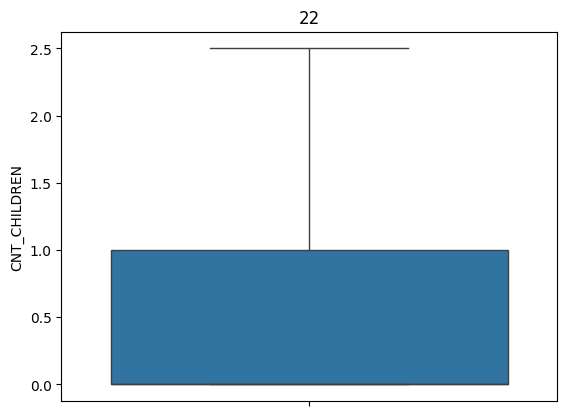

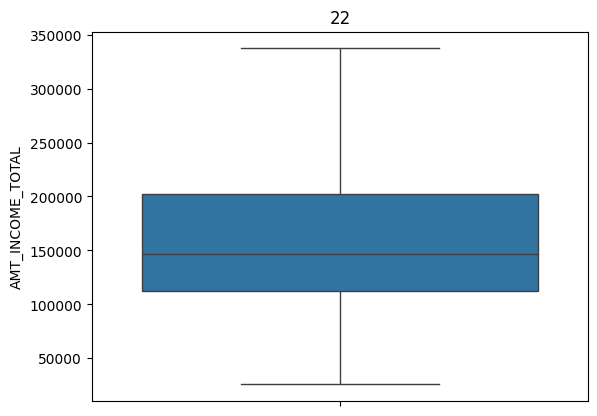

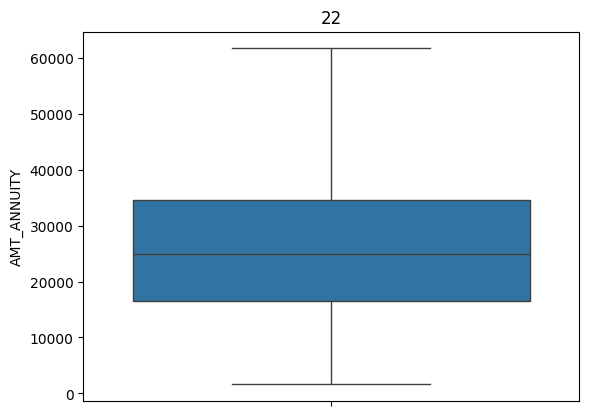

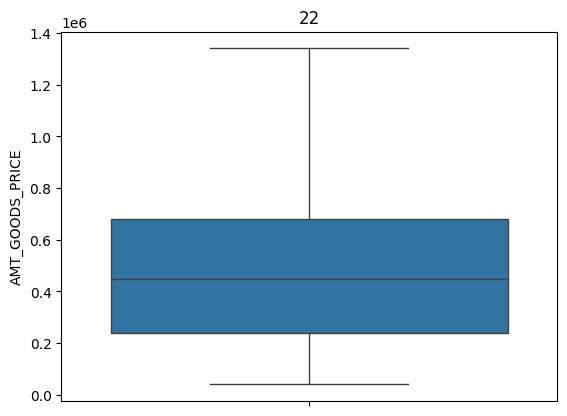

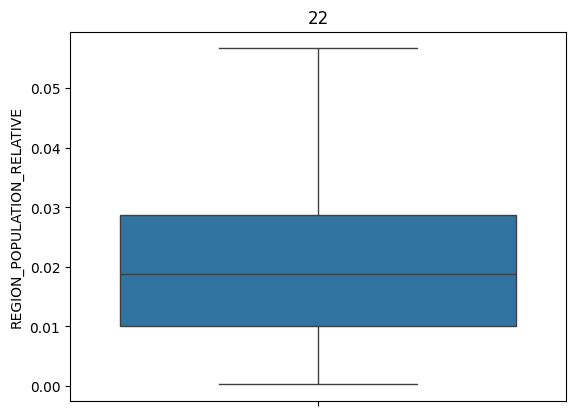

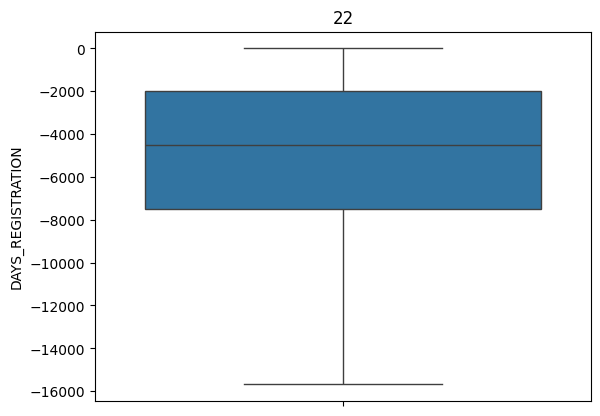

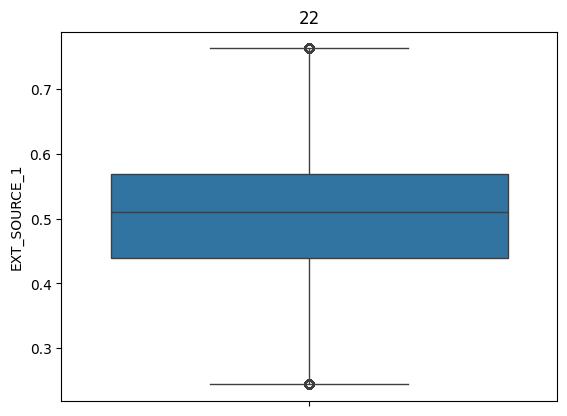

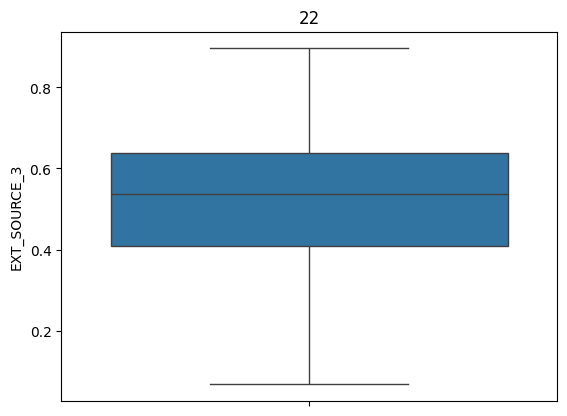

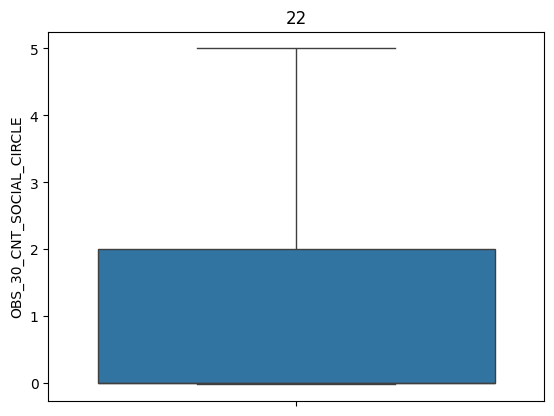

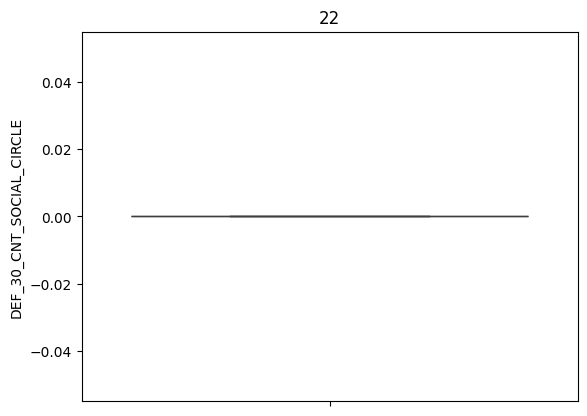

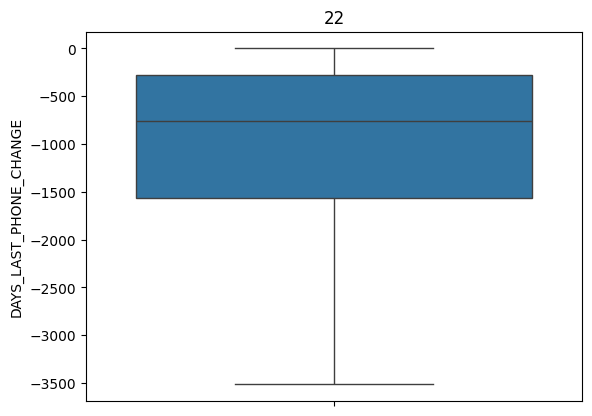

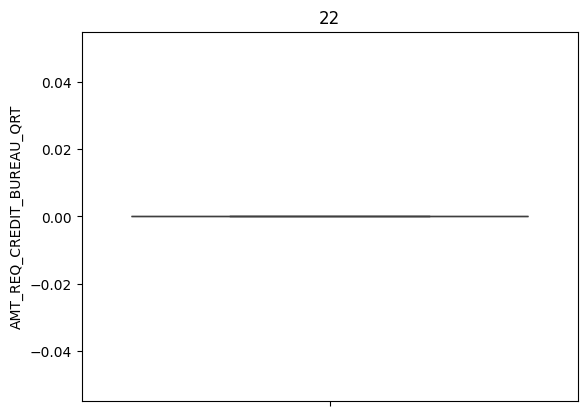

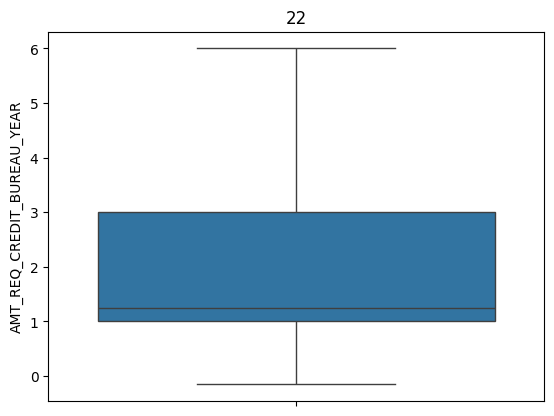

In [ ]:
for i in outlier_cols:
  plt.figure(i)
  plt.title(x)
  sns.boxplot(data = train_data[i])


In [ ]:
#make a copy of data after handling outliers
train_data.to_csv("/content/drive/MyDrive/Datasets/app_v3", index=False)

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/app_v3')

In [ ]:
nums_colunms,cat_columns = split_num_cat(train_data)

In [ ]:
def transform_data(df):
    from scipy.stats import skew,boxcox
    strong_skew = []
    moderate_skew = []
    weak_skew = []

    for i in df:
      skewness_value = skew(df[i], bias=False)

      if abs(skewness_value) >= 1:
          # Strong skew: Use logarithmic transformation
          strong_skew.append(i)
          #df[i] = np.log(df[i] + 1)
      elif 0.5 <= abs(skewness_value) < 1:
          # Moderate skew: Use Box-Cox
          moderate_skew.append(i)
          #df[i], _ = boxcox(df[i] + 1)
      else:
          # Weak skew: No transformation needed or standardization
          weak_skew.append(i)
          #df[i] = (df[i] - df[i].mean()) / df[i].std()

    return strong_skew,moderate_skew,weak_skew



In [ ]:
l1,l2,l3 = transform_data(train_data[nums_colunms])
print(f'columns with strong skewness :\n {l1}\n')
print(f'columns with moderate skewness :\n {l2}\n')
print(f'columns with weak skewness :\n {l3}\n')


columns with strong skewness :
 ['TARGET', 'CNT_CHILDREN', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVINGAREA_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR']

columns with moderate skewness :
 ['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE']

columns with weak skewness :
 ['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_QRT']



<ipython-input-61-227e9050a6a6>:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness_value = skew(df[i], bias=False)


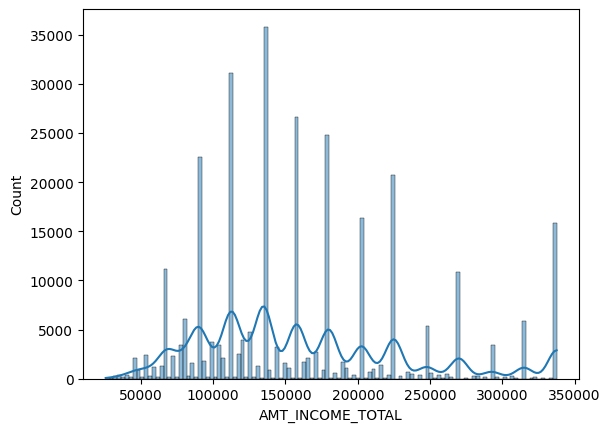

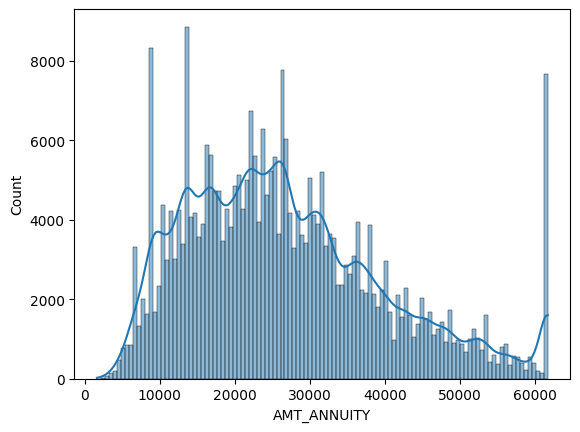

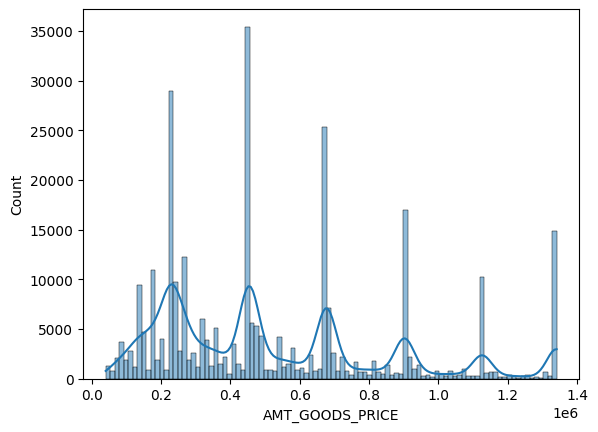

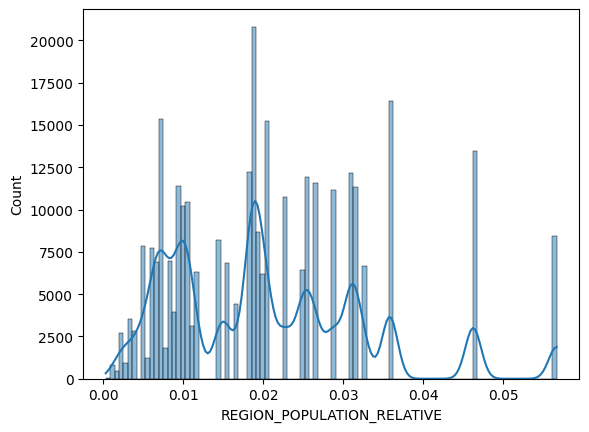

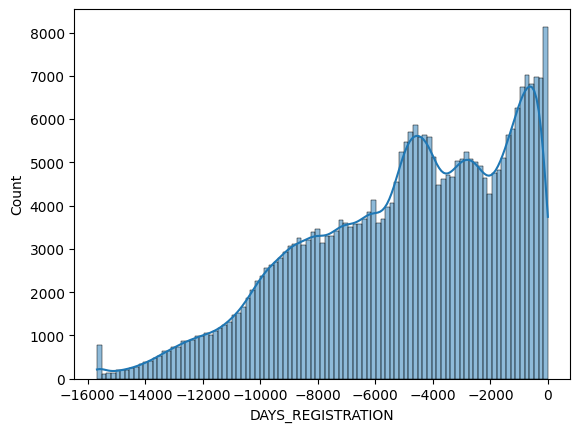

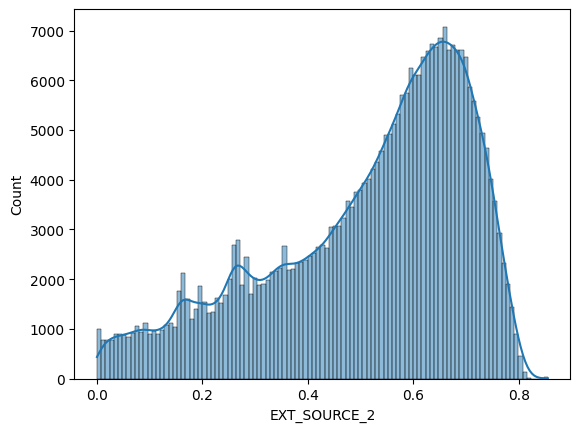

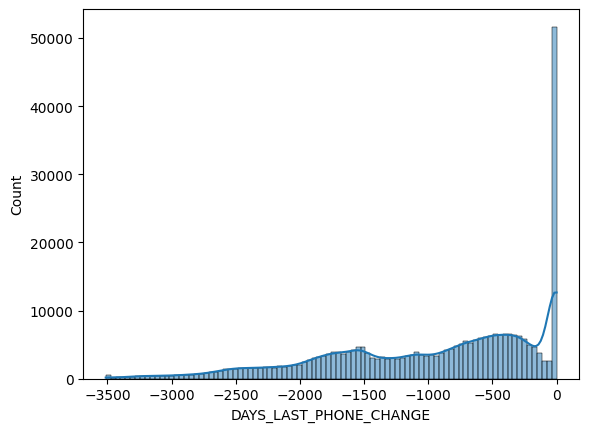

In [ ]:
import seaborn as sns
for col in l2:
    plt.figure(col)
    sns.histplot(train_data[col], kde=True)



we need to handle only moderate skewness

In [ ]:
from scipy import stats

for i in l2:
  train_data[i] = np.power(train_data[i] + 1, 1/3)

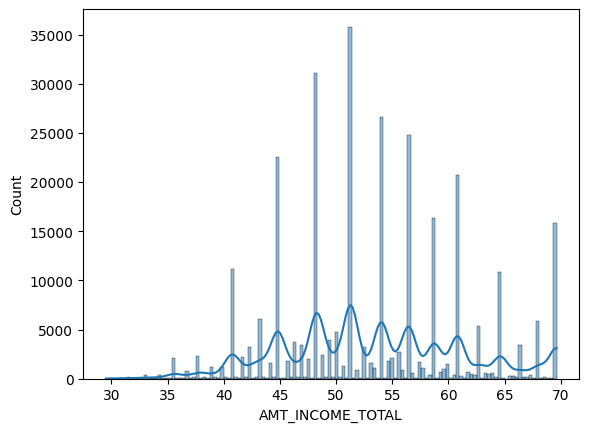

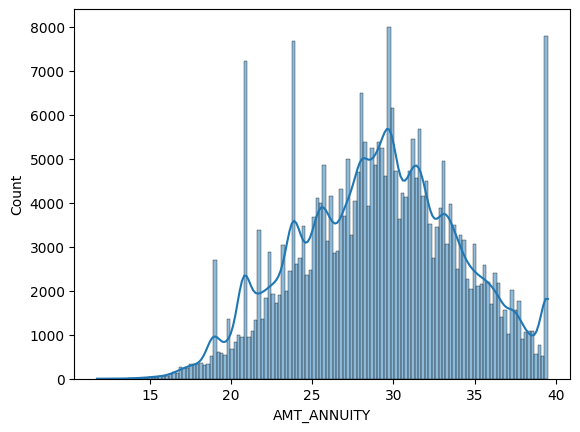

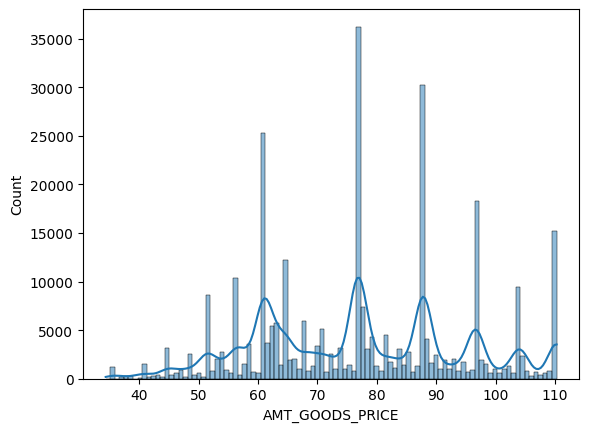

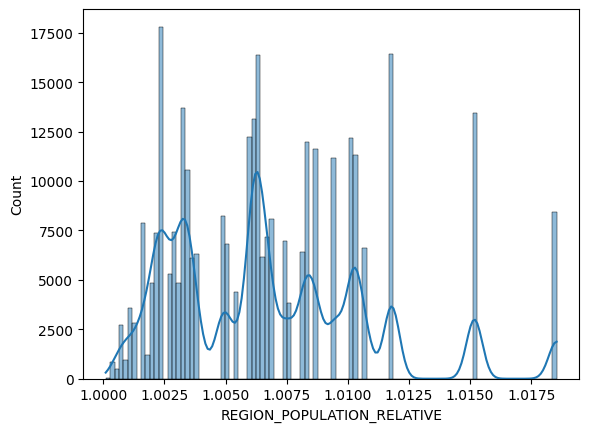

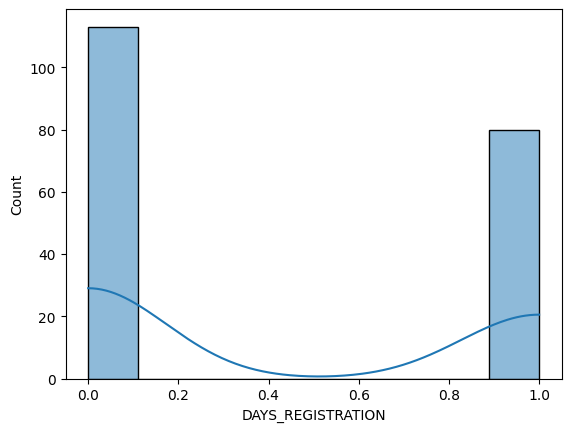

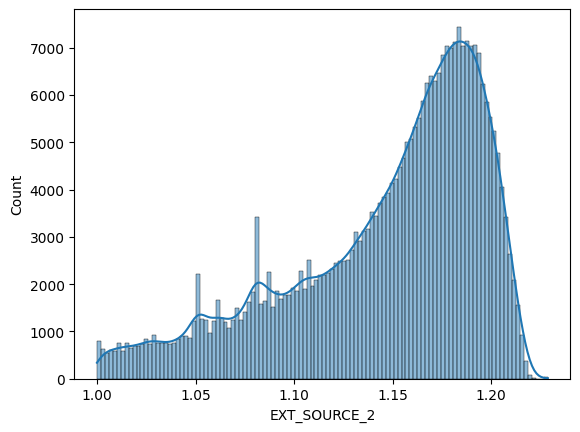

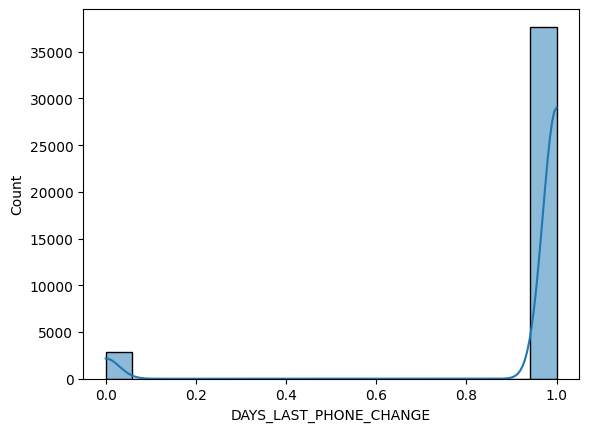

In [ ]:
for col in l2:
    plt.figure(col)
    sns.histplot(train_data[col], kde=True)

In [ ]:
print(len(nums_colunms))

27


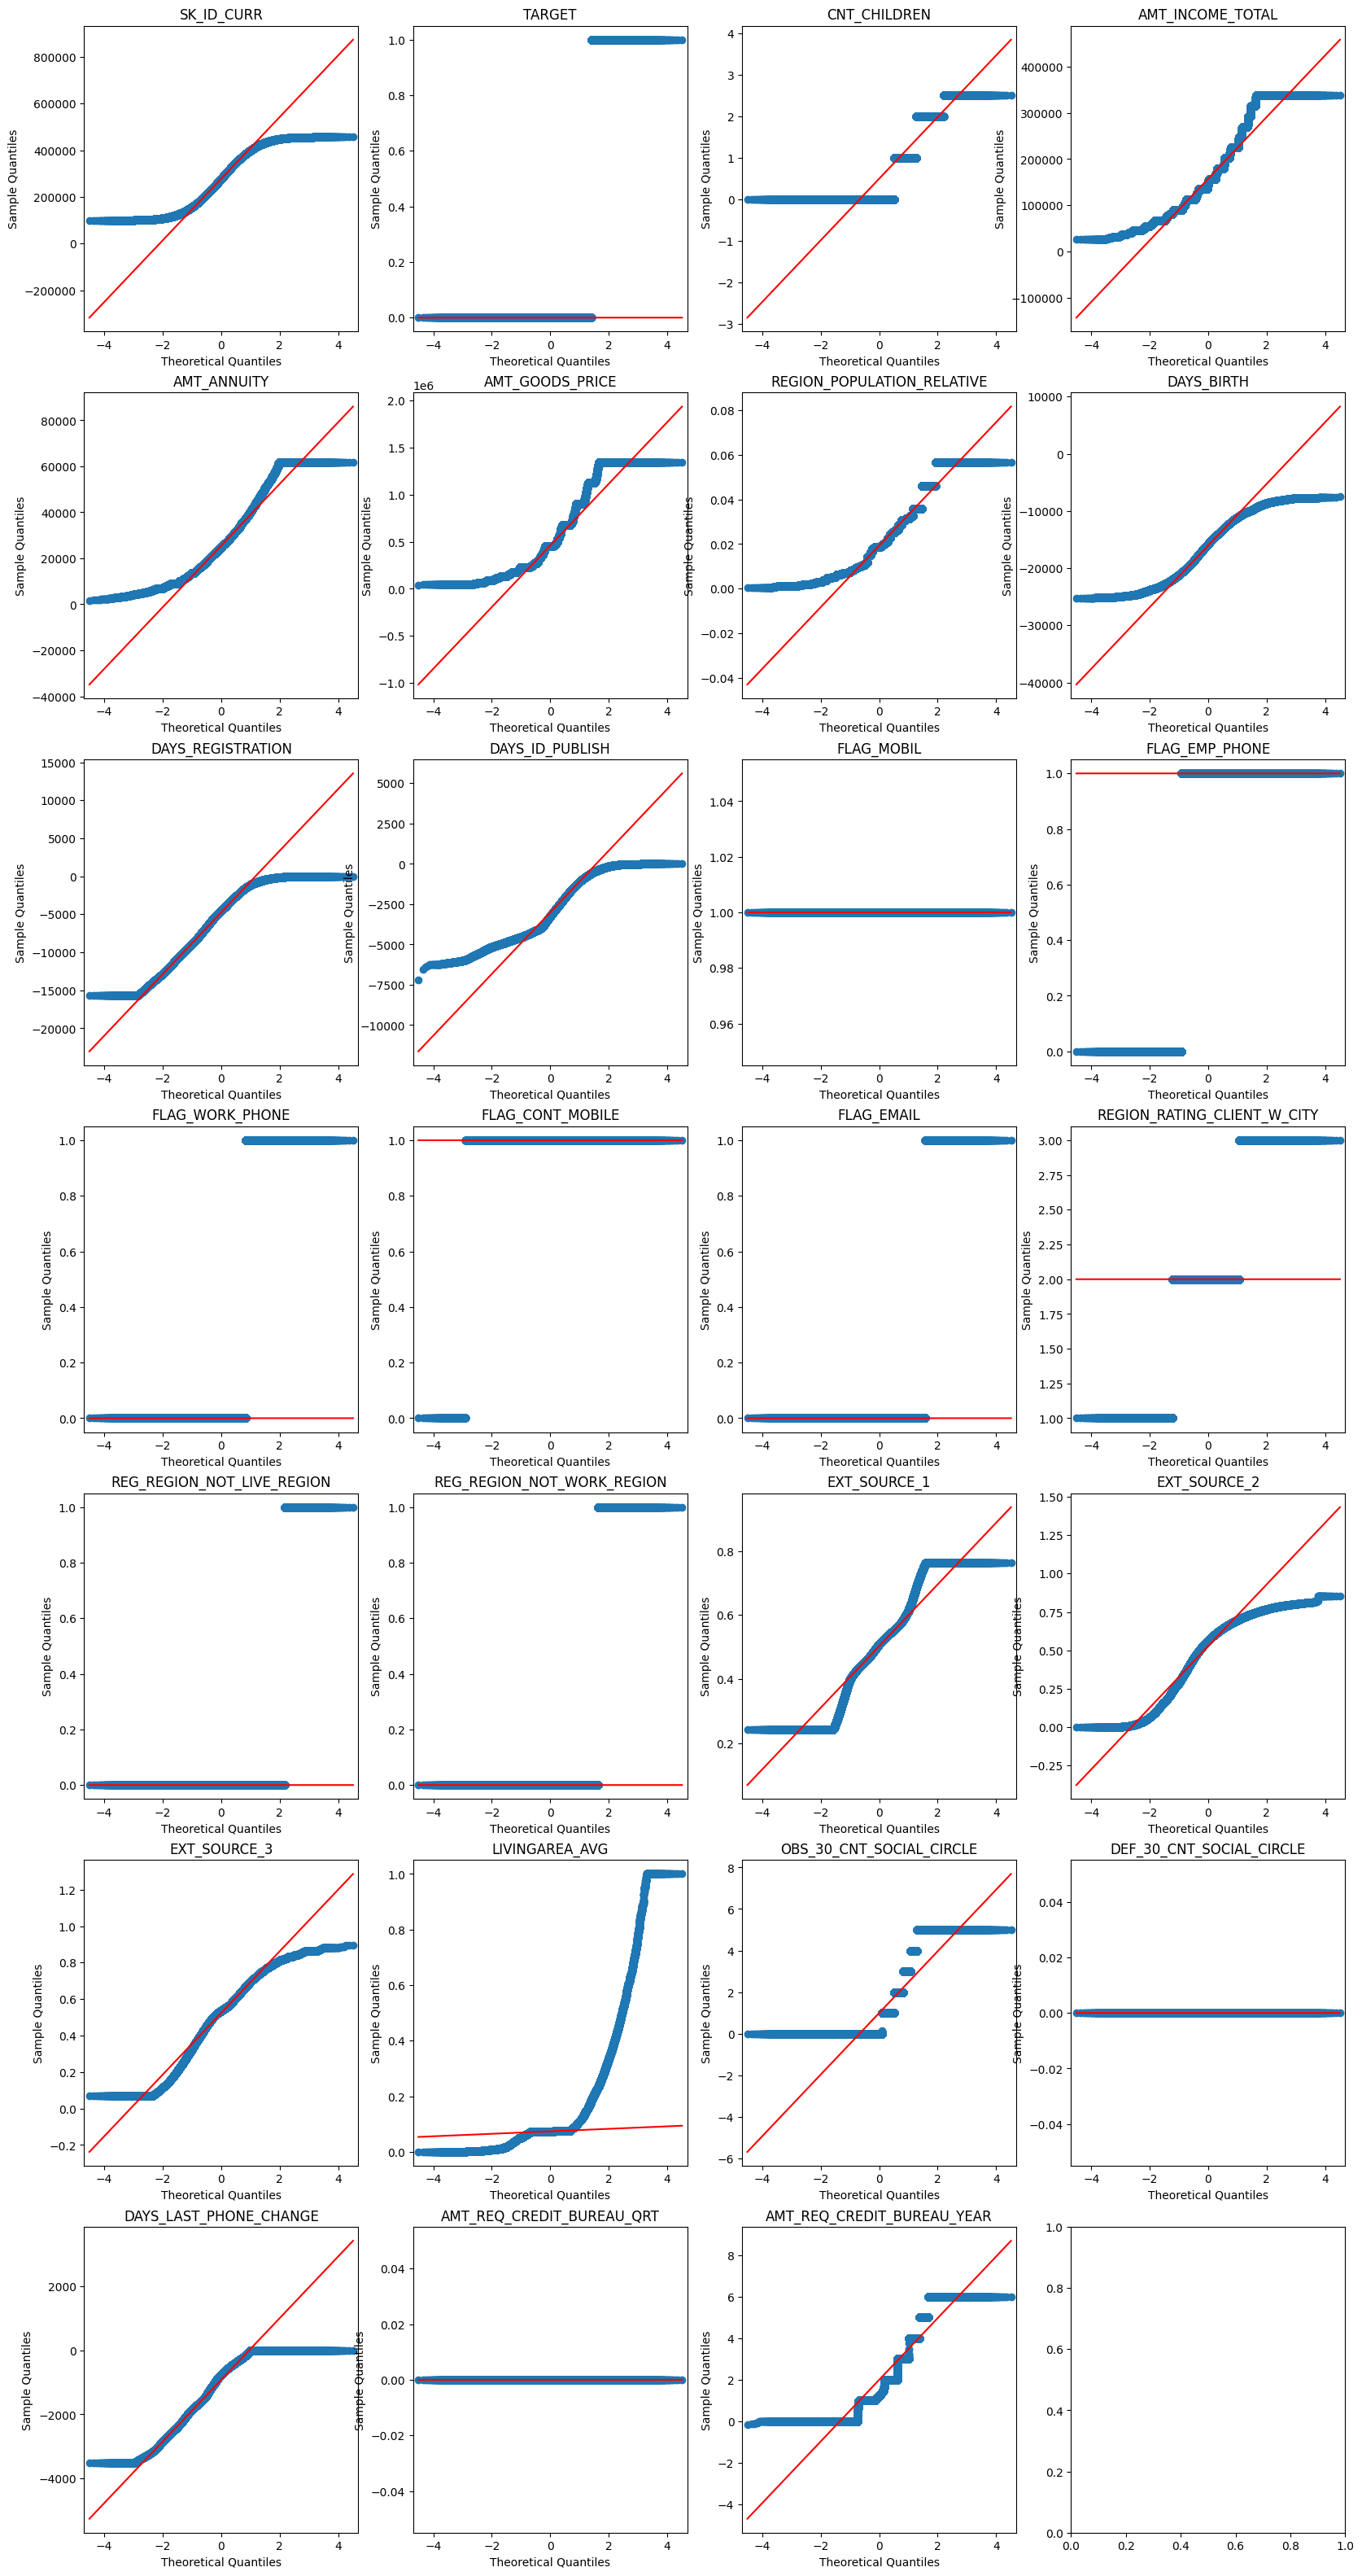

In [ ]:
import statsmodels.api as sm
ncols = 4
nrows=7
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20, 40))
i=0
j=0
for col in nums_colunms:
    sm.qqplot(train_data[col],fit = False, line='q', ax = axes[i, j])
    axes[i, j].set_title(col)
    if(j<ncols-1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

In [ ]:
feats_std_scale = []
feats_min_max_scale = []
from scipy.stats import shapiro
for col in nums_colunms:
    stat, p = shapiro(train_data[col])
    print('W_Statistic=%.3f, p=%.8f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print(f'{col} looks like gaussian (fail to reject H0)')
        feats_std_scale.append(col)
    else:
        print(f'{col} does not look Gaussian (reject H0)\n')
        feats_min_max_scale.append(col)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 307496.
  res = hypotest_fun_out(*samples, **kwds)


W_Statistic=0.955, p=0.00000000
SK_ID_CURR does not look Gaussian (reject H0)

W_Statistic=0.302, p=0.00000000
TARGET does not look Gaussian (reject H0)

W_Statistic=0.628, p=0.00000000
CNT_CHILDREN does not look Gaussian (reject H0)

W_Statistic=0.934, p=0.00000000
AMT_INCOME_TOTAL does not look Gaussian (reject H0)

W_Statistic=0.954, p=0.00000000
AMT_ANNUITY does not look Gaussian (reject H0)

W_Statistic=0.912, p=0.00000000
AMT_GOODS_PRICE does not look Gaussian (reject H0)

W_Statistic=0.932, p=0.00000000
REGION_POPULATION_RELATIVE does not look Gaussian (reject H0)

W_Statistic=0.970, p=0.00000000
DAYS_BIRTH does not look Gaussian (reject H0)

W_Statistic=0.953, p=0.00000000
DAYS_REGISTRATION does not look Gaussian (reject H0)

W_Statistic=0.941, p=0.00000000
DAYS_ID_PUBLISH does not look Gaussian (reject H0)

W_Statistic=1.000, p=1.00000000
FLAG_MOBIL looks like gaussian (fail to reject H0)
W_Statistic=0.467, p=0.00000000
FLAG_EMP_PHONE does not look Gaussian (reject H0)

W_Stat

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


W_Statistic=0.974, p=0.00000000
EXT_SOURCE_3 does not look Gaussian (reject H0)

W_Statistic=0.569, p=0.00000000
LIVINGAREA_AVG does not look Gaussian (reject H0)

W_Statistic=0.729, p=0.00000000
OBS_30_CNT_SOCIAL_CIRCLE does not look Gaussian (reject H0)

W_Statistic=1.000, p=1.00000000
DEF_30_CNT_SOCIAL_CIRCLE looks like gaussian (fail to reject H0)
W_Statistic=0.922, p=0.00000000
DAYS_LAST_PHONE_CHANGE does not look Gaussian (reject H0)

W_Statistic=1.000, p=1.00000000
AMT_REQ_CREDIT_BUREAU_QRT looks like gaussian (fail to reject H0)
W_Statistic=0.873, p=0.00000000
AMT_REQ_CREDIT_BUREAU_YEAR does not look Gaussian (reject H0)



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
min_max_scaler_model = min_max_scaler.fit(train_data[feats_min_max_scale])
min_max_scaled_data = pd.DataFrame(min_max_scaler_model.transform(train_data[feats_min_max_scale]), columns = feats_min_max_scale)

std_scaler = StandardScaler()
std_scaler_model = std_scaler.fit(train_data[feats_std_scale])
std_scaled_data =pd.DataFrame( std_scaler_model.transform(train_data[feats_std_scale]), columns = feats_std_scale)

num_train_df = std_scaled_data.merge(min_max_scaled_data, right_index = True, left_index = True)
num_train_df

,FLAG_MOBIL,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_QRT,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,LIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.000000,1.0,0.0,0.567100,0.384183,0.238754,0.328451,...,0.5,0.0,0.0,0.000000,0.307542,0.085991,0.019000,0.402230,0.677291,0.187561
1,0.0,0.0,0.0,0.000003,0.0,0.0,0.783550,0.567213,0.837370,0.057684,...,0.0,0.0,0.0,0.129340,0.727773,0.523420,0.054900,0.202973,0.764371,0.025073
2,0.0,0.0,0.0,0.000006,0.0,0.0,0.134199,0.085449,0.072664,0.172858,...,0.5,0.0,0.0,0.584409,0.650190,0.798938,0.074282,0.003716,0.768071,0.025073
3,0.0,0.0,0.0,0.000011,0.0,0.0,0.350649,0.467161,0.197232,0.137140,...,0.5,0.0,0.0,0.551656,0.760751,0.606695,0.074333,0.402230,0.824417,0.276053
4,0.0,0.0,0.0,0.000014,0.0,0.0,0.307359,0.337003,0.363322,0.503438,...,0.5,0.0,0.0,0.550732,0.377472,0.626489,0.074092,0.003716,0.685259,0.025073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307491,0.0,0.0,0.0,0.999989,0.0,0.0,0.422799,0.431738,0.141869,0.572602,...,0.0,0.0,0.0,0.000000,0.797231,0.549133,0.196500,0.003716,0.922311,0.228889
307492,0.0,0.0,0.0,0.999992,0.0,0.0,0.148629,0.172845,0.141869,0.441353,...,0.5,0.0,0.0,0.261448,0.135663,0.510981,0.025700,0.003716,1.000000,0.214659
307493,0.0,0.0,0.0,0.999994,0.0,0.0,0.408369,0.472029,0.418685,0.083608,...,1.0,0.0,0.0,0.964269,0.626575,0.182006,0.927900,1.000000,0.456744,0.187561
307494,0.0,0.0,0.0,0.999997,1.0,0.0,0.466089,0.309369,0.214533,0.089126,...,0.5,0.0,0.0,0.491981,0.601360,0.716138,0.006100,0.003716,0.908367,0.025073


In [ ]:
print(cat_columns)
print(len(cat_columns))

['OCCUPATION_TYPE', 'FLAG_OWN_CAR', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'FLAG_OWN_REALTY', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE', 'NAME_FAMILY_STATUS']
9


In [ ]:
for i in cat_columns:
  print(f'column name : {i}')
  print(train_data[i].head(5))
  print('\n')

column name : OCCUPATION_TYPE
0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object


column name : FLAG_OWN_CAR
0    N
1    N
2    Y
3    N
4    N
Name: FLAG_OWN_CAR, dtype: object


column name : CODE_GENDER
0    M
1    F
2    M
3    F
4    M
Name: CODE_GENDER, dtype: object


column name : NAME_INCOME_TYPE
0          Working
1    State servant
2          Working
3          Working
4          Working
Name: NAME_INCOME_TYPE, dtype: object


column name : NAME_HOUSING_TYPE
0    House / apartment
1    House / apartment
2    House / apartment
3    House / apartment
4    House / apartment
Name: NAME_HOUSING_TYPE, dtype: object


column name : FLAG_OWN_REALTY
0    Y
1    N
2    Y
3    Y
4    Y
Name: FLAG_OWN_REALTY, dtype: object


column name : ORGANIZATION_TYPE
0    Business Entity Type 3
1                    School
2                Government
3    Business Entity Type 3
4                  Religion
Name: ORGANIZATION_TYPE, dt

In [ ]:
train_data.shape

(307496, 36)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

one_hot_encoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

preprocessor = ColumnTransformer( transformers=[ ('cat', one_hot_encoder, cat_columns),
                                                 ('num', 'passthrough', nums_colunms)])

df_encoded = preprocessor.fit_transform(train_data) # Convert the result back to a DataFrame
df_encoded = pd.DataFrame(df_encoded, columns=preprocessor.get_feature_names_out())

In [ ]:
print(df_encoded.columns)

Index(['cat__OCCUPATION_TYPE_Accountants',
       'cat__OCCUPATION_TYPE_Cleaning staff',
       'cat__OCCUPATION_TYPE_Cooking staff', 'cat__OCCUPATION_TYPE_Core staff',
       'cat__OCCUPATION_TYPE_Drivers', 'cat__OCCUPATION_TYPE_HR staff',
       'cat__OCCUPATION_TYPE_High skill tech staff',
       'cat__OCCUPATION_TYPE_IT staff', 'cat__OCCUPATION_TYPE_Laborers',
       'cat__OCCUPATION_TYPE_Low-skill Laborers',
       ...
       'num__REG_REGION_NOT_WORK_REGION', 'num__EXT_SOURCE_1',
       'num__EXT_SOURCE_2', 'num__EXT_SOURCE_3', 'num__LIVINGAREA_AVG',
       'num__OBS_30_CNT_SOCIAL_CIRCLE', 'num__DEF_30_CNT_SOCIAL_CIRCLE',
       'num__DAYS_LAST_PHONE_CHANGE', 'num__AMT_REQ_CREDIT_BUREAU_QRT',
       'num__AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=131)


In [ ]:
print(train_data.shape)

(307496, 36)


In [ ]:
df_encoded = pd.get_dummies(train_data, columns=cat_columns, drop_first=True)

In [ ]:
print(df_encoded.shape)

(307496, 122)


In [ ]:
df_encoded.head(5)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_CONTRACT_TYPE_Revolving loans,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
0,100002,1,0.0,202500.0,24700.5,351000.0,0.018801,-9461,-3648.0,-2120,...,False,False,False,False,False,False,False,False,True,False
1,100003,0,0.0,270000.0,35698.5,1129500.0,0.003541,-16765,-1186.0,-291,...,False,False,False,False,False,False,True,False,False,False
2,100004,0,0.0,67500.0,6750.0,135000.0,0.010032,-19046,-4260.0,-2531,...,False,False,False,False,False,True,False,False,True,False
3,100006,0,0.0,135000.0,29686.5,297000.0,0.008019,-19005,-9833.0,-2437,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0.0,121500.0,21865.5,513000.0,0.028663,-19932,-4311.0,-3458,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
y=df_encoded['TARGET']

In [ ]:
X=df_encoded.drop(['TARGET'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   test_size= 0.20, random_state=100, stratify=y)

In [ ]:
print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", y_test.shape)

X_train =  (245996, 121)  y_train =  (245996,)
X_test  =  (61500, 121)  y_test  =  (61500,)


In [ ]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression( class_weight='balanced')
LR.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [ ]:
LR.score(X_train,y_train)

0.6139286817671832

In [ ]:
LR.score(X_test,y_test)

0.6114959349593496

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = LR.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.62      0.75     56535
           1       0.11      0.51      0.18      4965

    accuracy                           0.61     61500
   macro avg       0.52      0.57      0.46     61500
weighted avg       0.87      0.61      0.70     61500



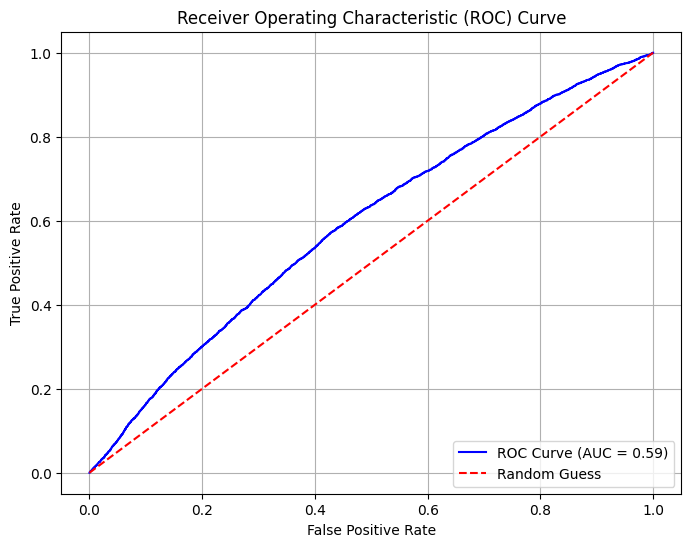

AUC Score: 0.59


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined from your Logistic Regression model

# Step 1: Get predicted probabilities for the positive class
y_prob = LR.predict_proba(X_test)[:, 1]

# Step 2: Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Step 3: Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')  # Dashed diagonal for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print the AUC score
print(f"AUC Score: {auc_score:.2f}")


In [ ]:
#grid search